# 1- gold-price-prediction-linear-regression

Use the "Run" button to execute the code.

In [3]:
print('Hello World')

Hello World


In [4]:
import numpy as np 
import pandas as pd

In [5]:
# LinearRegression is a machine learning library for linear regression
from sklearn.linear_model import LinearRegression

In [6]:
# matplotlib and seaborn are used for plotting graphs
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

<ipython-input-6-c784a94f1da1>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


In [7]:
# yahoo finance is used to fetch data
!pip install yfinance
import yfinance as yf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
# Read data
df = yf.download('GLD', '2008-01-01', '2023-03-31', auto_adjust=True)

[*********************100%***********************]  1 of 1 completed


In [10]:
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2023-03-24,185.610001,185.990005,183.619995,183.649994,9253100
2023-03-27,181.149994,182.149994,180.690002,181.949997,6925000
2023-03-28,182.309998,183.619995,182.119995,183.440002,6202600
2023-03-29,182.490005,183.270004,182.240005,182.529999,4996500
2023-03-30,182.750000,184.440002,182.550003,184.179993,6360300


In [11]:
# Only keep close columns
df = df[['Close']]

In [12]:
# Drop rows with missing values
df = df.dropna()

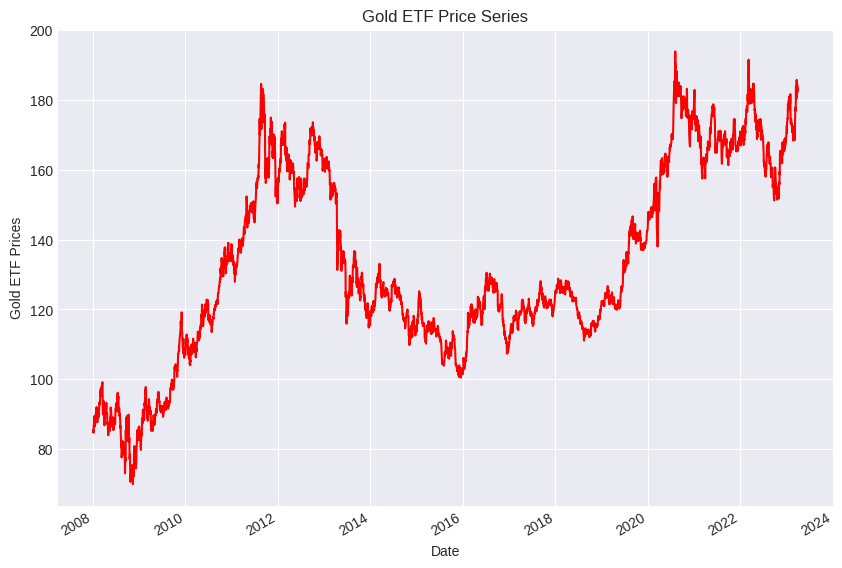

In [13]:
# Plot the closing price of GLD
df.Close.plot(figsize=(10, 7),color='r')
plt.ylabel("Gold ETF Prices")
plt.title("Gold ETF Price Series")
plt.show()

In [14]:
# Define explanatory variables
df['S_3'] = df['Close'].rolling(window=3).mean()
df['S_9'] = df['Close'].rolling(window=9).mean()
df['next_day_price'] = df['Close'].shift(-1)

In [15]:
df.head()

,Close,S_3,S_9,next_day_price
Date,,,,
2008-01-02,84.860001,NaN,NaN,85.570000
2008-01-03,85.570000,NaN,NaN,85.129997
2008-01-04,85.129997,85.186666,NaN,84.769997
2008-01-07,84.769997,85.156665,NaN,86.779999
2008-01-08,86.779999,85.559998,NaN,86.550003


In [16]:
df = df.dropna()
X = df[['S_3', 'S_9']]

In [17]:
# Define dependent variable
y = df['next_day_price']

In [18]:
# Split the data into train and test dataset
t = .8
t = int(t*len(df))

In [19]:
# Train dataset
X_train = X[:t]
y_train = y[:t]

In [20]:
# Test dataset
X_test = X[t:]
y_test = y[t:]

In [21]:
# Create a linear regression model
linear = LinearRegression().fit(X_train, y_train)
print("Linear Regression model")
print("Gold ETF Price (y) = %.2f * 3 Days Moving Average (x1) \
+ %.2f * 9 Days Moving Average (x2) \
+ %.2f (constant)" % (linear.coef_[0], linear.coef_[1], linear.intercept_))

Linear Regression model
Gold ETF Price (y) = 1.20 * 3 Days Moving Average (x1) + -0.21 * 9 Days Moving Average (x2) + 0.45 (constant)


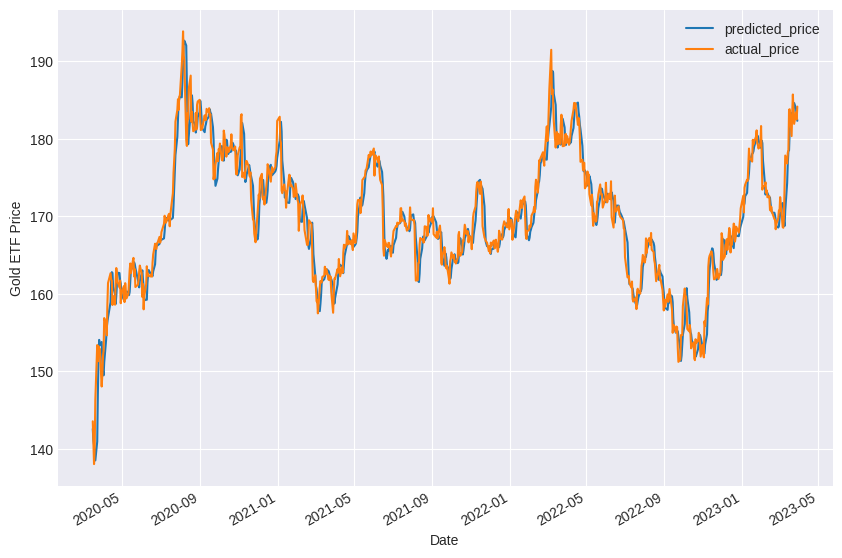

In [22]:
# Predicting the Gold ETF prices
predicted_price = linear.predict(X_test)
predicted_price = pd.DataFrame(
    predicted_price, index=y_test.index, columns=['price'])
predicted_price.plot(figsize=(10, 7))
y_test.plot()
plt.legend(['predicted_price', 'actual_price'])
plt.ylabel("Gold ETF Price")
plt.show()

In [23]:
# R square
r2_score = linear.score(X[t:], y[t:])*100
float("{0:.2f}".format(r2_score))

93.35

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.
